In [3]:
import pandas as pd
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
sid = SentimentIntensityAnalyzer()

In [5]:
a = "This is a good movie"

In [6]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [7]:
a = "This was the best, most awesome movie EVER MADE!!!"

In [8]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [9]:
a = "This was the worst., most distrubing and horrific movie EVER MADE!!!"

In [10]:
sid.polarity_scores(a)

{'neg': 0.356, 'neu': 0.644, 'pos': 0.0, 'compound': -0.7608}

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv(r'C:\Users\Akash\Desktop\New folder\UPDATED_NLP_COURSE\TextFiles\amazonreviews.tsv', sep = '\t')

In [13]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [14]:
df['label'].value_counts().plot(kind = 'bar')

In [15]:
df.dropna(inplace = True)

In [16]:
df.itertuples

<bound method DataFrame.itertuples of      label                                             review
0      pos  Stuning even for the non-gamer: This sound tra...
1      pos  The best soundtrack ever to anything.: I'm rea...
2      pos  Amazing!: This soundtrack is my favorite music...
3      pos  Excellent Soundtrack: I truly like this soundt...
4      pos  Remember, Pull Your Jaw Off The Floor After He...
5      pos  an absolute masterpiece: I am quite sure any o...
6      neg  Buyer beware: This is a self-published book, a...
7      pos  Glorious story: I loved Whisper of the wicked ...
8      pos  A FIVE STAR BOOK: I just finished reading Whis...
9      pos  Whispers of the Wicked Saints: This was a easy...
10     neg  The Worst!: A complete waste of time. Typograp...
11     pos  Great book: This was a great book,I just could...
12     pos  Great Read: I thought this book was brilliant,...
13     neg  Oh please: I guess you have to be a romance no...
14     neg  Awful beyond belief!

In [18]:
blanks = []
for i, lb, rv in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)

In [19]:
blanks

[]

In [20]:
df.iloc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [21]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [22]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [23]:
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [24]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [25]:
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [26]:
 df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

In [27]:
df.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [28]:
df['compound'].head(1)

0    0.9454
Name: compound, dtype: float64

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
accuracy_score(df['label'], df['comp_score'])

0.7091

In [31]:
print(classification_report(df['label'], df['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

   micro avg       0.71      0.71      0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [32]:
import numpy as np

In [33]:
data = pd.read_csv(r'C:\Users\Akash\Desktop\New folder\UPDATED_NLP_COURSE\TextFiles\smsspamcollection.tsv', sep = '\t')

In [34]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [35]:
a = data['label'].value_counts()
a

ham     4825
spam     747
Name: label, dtype: int64

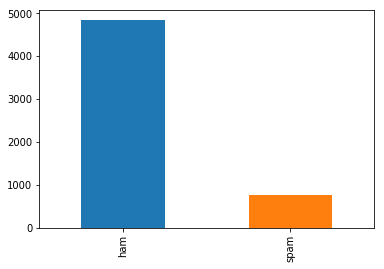

In [36]:
a.plot(kind = 'bar')

In [37]:
# 

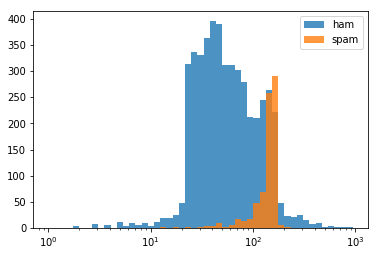

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(data[data['label'] == 'ham']['length'], bins = bins, alpha = 0.8)
plt.hist(data[data['label'] == 'spam']['length'], bins = bins, alpha = 0.8)
plt.legend(('ham', 'spam'))
plt.show()

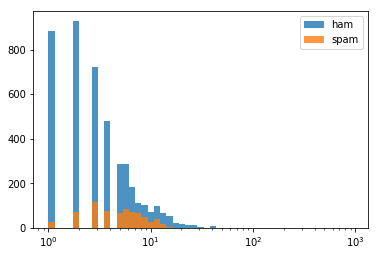

In [39]:
plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(data[data['label'] == 'ham']['punct'], bins = bins, alpha = 0.8)
plt.hist(data[data['label'] == 'spam']['punct'], bins = bins, alpha = 0.8)
plt.legend(('ham', 'spam'))
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = data[['length', 'punct']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr_model = LogisticRegression(solver = 'lbfgs')

In [44]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
from sklearn import metrics

In [46]:
predictions = lr_model.predict(X_test)

In [47]:
metrics.confusion_matrix(y_test, predictions)

array([[1547,   46],
       [ 241,    5]], dtype=int64)

In [48]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'], columns = ['ham', 'spam'])

In [49]:
df

,ham,spam
ham,1547,46
spam,241,5


In [50]:
metrics.classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n         ham       0.87      0.97      0.92      1593\n        spam       0.10      0.02      0.03       246\n\n   micro avg       0.84      0.84      0.84      1839\n   macro avg       0.48      0.50      0.47      1839\nweighted avg       0.76      0.84      0.80      1839\n'

In [51]:
metrics.accuracy_score(y_test, predictions)

0.843936922240348

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1583   10]
 [ 246    0]]


In [54]:
print(metrics.confusion_matrix(y_test, predictions))

[[1583   10]
 [ 246    0]]


In [55]:
from sklearn.svm import SVC

In [56]:
svc_model = SVC(gamma = 'auto')

In [57]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
predictions = svc_model.predict(X_test)

In [59]:
print(metrics.confusion_matrix(y_test, predictions))

[[1515   78]
 [ 131  115]]


In [60]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index = ['ham', 'spam'], columns = ['ham', 'spam'])

In [61]:
df

,ham,spam
ham,1515,78
spam,131,115


In [14]:
vocab = {}
i = 1

with open(r'C:\Users\Akash\Desktop\New folder\UPDATED_NLP_COURSE\03-Text-Classification\1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    if word in vocab:
        continue
    else:
        vocab[word] = i
        i += 1
print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


# Text Feature Extraction

In [4]:
df2 = pd.read_csv(r'C:\Users\Akash\Desktop\New folder\UPDATED_NLP_COURSE\TextFiles\smsspamcollection.tsv', sep = '\t')

In [5]:
df2.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df2.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df2.dropna(inplace = True)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
from sklearn.model_selection import train_test_split

X = df2['message']  # this time we want to look at the text
y = df2['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3733, 7082)

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3733, 7082)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3733, 7082)

In [34]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [35]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [36]:
predictions = text_clf.predict(X_test)

In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1586    7]
 [  12  234]]


In [38]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

   micro avg       0.99      0.99      0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [39]:
print(metrics.accuracy_score(y_test,predictions))

0.989668297988037
